In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [24]:
data = pd.read_csv('data/zayavki_dataset.csv')
data

,ДАТА,СТАТУС_НА_ЗАЯВКАТА,ТЪРГОВЕЦ,КЛИЕНТ КОД - ВРЪЗКА,ОБЕКТ КОД - ВРЪЗКА,КЛИЕНТ,ОБЕКТ,ОТТГ,АДРЕС_ЗА_ДОСТАВКА,ZaraEX КОД,...,РАЗТОВАРВАНЕ,ПРЕСТОЙ_АДРЕС,АДМИНИСТРАТОР,ПОСЛЕДНА ПРОМЯНА ОТ,ДАТА НА ПРОМЕНИТЕ,ID,ГОДИНА,МЕСЕЦ,ДЕН,ФАЙЛОВЕ
0,20250611-0001,ПОДАДЕНА,OT E-MAIL,0705,0013,ХИМОЙЛ БГ ЕООД,"""ФТСЕМ"" АД - Ведомствена бензиностанция Летище...",148045472-10135-1,АДМИНИСТРАТИВЕН,&0705&0013&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:18:26.661,1138,2025,6,11,NaN
1,20250611-0002,ПОДАДЕНА,OT E-MAIL,0705,0009,ХИМОЙЛ БГ ЕООД,"ВЕДОМ.БЕН-Я.,КОРАБОРЕМОНТЕН ЗАВОД ОДЕСОС,ГР.ВА...",103036629-10135-1,АДМИНИСТРАТИВЕН,&0705&0009&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:19:32.321,1139,2025,6,11,NaN
2,20250611-0003,ПОДАДЕНА,ПЛАМЕН ДОБРЕВ,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:45:41.083,1140,2025,6,11,NaN
3,20250611-0004,ПОДАДЕНА,ПЛАМЕН ДОБРЕВ,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:46:15.385,1141,2025,6,11,NaN
4,20250611-0005,ПОДАДЕНА,ГЕНАДИ ПЕТРОВ,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 11:06:06.795,1142,2025,6,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,20250919-0014,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:06.889,2719,2025,9,19,NaN
1530,20250919-0015,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,1299,0001,АГРОЗЕМ 05 ЕООД,СТОПАНСКИ ДВОР НА АГРОЗЕМ 05 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1299&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.660,2720,2025,9,19,NaN
1531,20250919-0016,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,1170,0001,ДЕТЕЛИНА-ГБ 58 - ЕООД,БАЗА НА ДЕТЕЛИНА-ГБ 58 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1170&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.782,2721,2025,9,19,NaN
1532,20250919-0017,ПОДАДЕНА,ГЕНАДИ ПЕТРОВ,1130,0001,М-1 ЕООД,"БЕНЗИНОСТАНЦИЯ М-1 ЕООД,ГР.ТРЯВНА П.Р.СЛАВЕЙКО...",200394807-73403-1,РЕАЛЕН,&1130&0001&,...,2025-09-23,NaN,Ivo,Ivo,2025-09-19 14:52:37.948,2722,2025,9,19,NaN


In [25]:
data = data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', ''))
data

,дата,статус_на_заявката,търговец,клиент_код__връзка,обект_код__връзка,клиент,обект,оттг,адрес_за_доставка,zaraex_код,...,разтоварване,престой_адрес,администратор,последна_промяна_от,дата_на_промените,id,година,месец,ден,файлове
0,20250611-0001,ПОДАДЕНА,OT E-MAIL,0705,0013,ХИМОЙЛ БГ ЕООД,"""ФТСЕМ"" АД - Ведомствена бензиностанция Летище...",148045472-10135-1,АДМИНИСТРАТИВЕН,&0705&0013&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:18:26.661,1138,2025,6,11,NaN
1,20250611-0002,ПОДАДЕНА,OT E-MAIL,0705,0009,ХИМОЙЛ БГ ЕООД,"ВЕДОМ.БЕН-Я.,КОРАБОРЕМОНТЕН ЗАВОД ОДЕСОС,ГР.ВА...",103036629-10135-1,АДМИНИСТРАТИВЕН,&0705&0009&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:19:32.321,1139,2025,6,11,NaN
2,20250611-0003,ПОДАДЕНА,ПЛАМЕН ДОБРЕВ,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:45:41.083,1140,2025,6,11,NaN
3,20250611-0004,ПОДАДЕНА,ПЛАМЕН ДОБРЕВ,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:46:15.385,1141,2025,6,11,NaN
4,20250611-0005,ПОДАДЕНА,ГЕНАДИ ПЕТРОВ,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 11:06:06.795,1142,2025,6,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,20250919-0014,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:06.889,2719,2025,9,19,NaN
1530,20250919-0015,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,1299,0001,АГРОЗЕМ 05 ЕООД,СТОПАНСКИ ДВОР НА АГРОЗЕМ 05 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1299&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.660,2720,2025,9,19,NaN
1531,20250919-0016,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,1170,0001,ДЕТЕЛИНА-ГБ 58 - ЕООД,БАЗА НА ДЕТЕЛИНА-ГБ 58 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1170&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.782,2721,2025,9,19,NaN
1532,20250919-0017,ПОДАДЕНА,ГЕНАДИ ПЕТРОВ,1130,0001,М-1 ЕООД,"БЕНЗИНОСТАНЦИЯ М-1 ЕООД,ГР.ТРЯВНА П.Р.СЛАВЕЙКО...",200394807-73403-1,РЕАЛЕН,&1130&0001&,...,2025-09-23,NaN,Ivo,Ivo,2025-09-19 14:52:37.948,2722,2025,9,19,NaN


In [26]:
results = data.groupby('търговец')['количество'].sum()

In [27]:
sorted_results = results.sort_values(ascending=False)
sorted_results

търговец
ПЛАМЕН ДОБРЕВ      3047600
ВЕСЕЛА НИКОЛОВА    2451000
СИМЕОН ХАДЖИЕВ     1858700
OT E-MAIL          1456390
ГЕНАДИ ПЕТРОВ       562150
По Телефон           54800
Name: количество, dtype: int64

In [28]:
clients = data.groupby('клиент')['количество'].sum().reset_index()
clients_df = clients.reset_index().sort_values("количество", ascending=False)
print(clients_df)

     index                         клиент  количество
323    323                 ХИМОЙЛ БГ ЕООД     1255200
12      12         АГРО ОЙЛ БЪЛГАРИЯ ЕООД      751600
24      24                   АКЕРА-Д ЕООД      435900
284    284                       РУБИН АД      372500
76      76           ДЕВНЯ ТРАНС ОИЛ ЕООД      331300
..     ...                            ...         ...
26      26  АРАПОВСКИ МАНАСТИР СВ. НЕДЕЛЯ        1000
36      36                  БЕРГИН 13 ООД        1000
34      34       Ахмед Шабанов Ахмедов ЗП        1000
37      37             БИО ОРАНЖЕРИЯ ЕООД        1000
4        4  АГРАРЕН УНИВЕРСИТЕТ - ПЛОВДИВ        1000

[335 rows x 3 columns]


In [29]:
from sklearn.cluster import KMeans

X = clients[['количество']]
kmeans = KMeans(n_clusters=3, random_state=42)
clients['cluster'] = kmeans.fit_predict(X)
print(clients.sort_values("клиент"))

                            клиент  количество  cluster
0                       1 М 1 ЕООД        2000        0
1                          109 ООД       56000        0
2               АВТОМАГИСТРАЛИ ЕАД       24000        0
3        АВТОМАГИСТРАЛИ СОФИЯ ЕООД      140000        0
4    АГРАРЕН УНИВЕРСИТЕТ - ПЛОВДИВ        1000        0
..                             ...         ...      ...
330              ШЕЛФ М ПАУЪР ЕООД        2000        0
331                    ШИВА-7 ЕООД       22300        0
332         Шабан Шефкед Реджеб ЗП        3000        0
333               ЮНИОН ИВКОНИ ООД      275000        2
334            ЯНКО МАТЕВ МАТЕВ ЗП        2000        0

[335 rows x 3 columns]


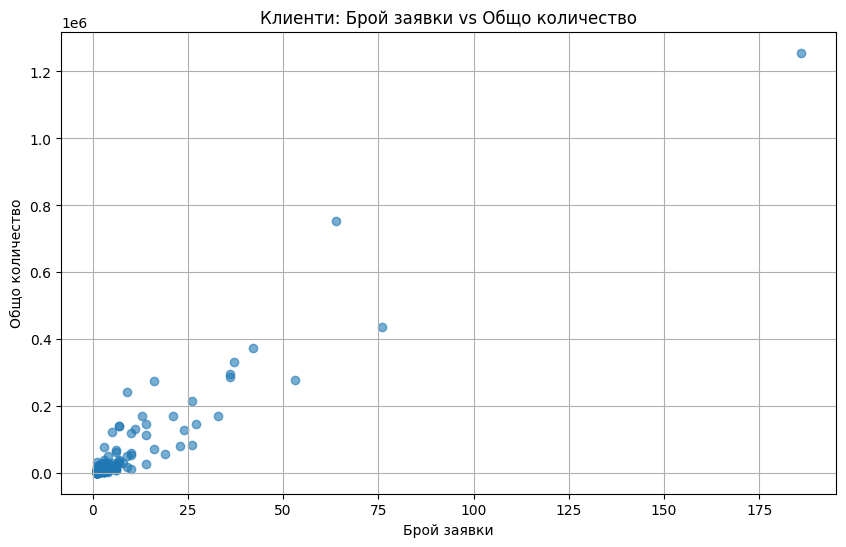

In [30]:
# Агрегация
clients = data.groupby("клиент").agg({
    "количество": "sum",
    "id": "count"     
}).rename(columns={"id": "БРОЙ_ЗАЯВКИ"}).reset_index()

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(clients["БРОЙ_ЗАЯВКИ"], clients["количество"], alpha=0.6)

plt.title("Клиенти: Брой заявки vs Общо количество")
plt.xlabel("Брой заявки")
plt.ylabel("Общо количество")
plt.grid(True)
plt.show()

In [31]:
len(clients)

335

In [32]:
clients = clients[clients['БРОЙ_ЗАЯВКИ'] > 10]
clients.sort_values('количество', ascending=False)

,клиент,количество,БРОЙ_ЗАЯВКИ
323,ХИМОЙЛ БГ ЕООД,1255200,186
12,АГРО ОЙЛ БЪЛГАРИЯ ЕООД,751600,64
24,АКЕРА-Д ЕООД,435900,76
284,РУБИН АД,372500,42
76,ДЕВНЯ ТРАНС ОИЛ ЕООД,331300,37
225,Криейтив М Груп ЕООД,296300,36
293,СОФТМР ЕООД,287500,36
233,М-1 ЕООД,277300,53
333,ЮНИОН ИВКОНИ ООД,275000,16
88,Джи Ти Ей Петролиум ООД,216000,26


In [33]:
clients = clients[clients['БРОЙ_ЗАЯВКИ'] > 100]
clients

,клиент,количество,БРОЙ_ЗАЯВКИ
323,ХИМОЙЛ БГ ЕООД,1255200,186


In [34]:
clients = data.groupby("клиент")["id"].count().reset_index()
clients = clients.rename(columns={"id": "orders_count",
                                  "клиент": "client"})
clients

,client,orders_count
0,1 М 1 ЕООД,2
1,109 ООД,19
2,АВТОМАГИСТРАЛИ ЕАД,2
3,АВТОМАГИСТРАЛИ СОФИЯ ЕООД,7
4,АГРАРЕН УНИВЕРСИТЕТ - ПЛОВДИВ,1
...,...,...
330,ШЕЛФ М ПАУЪР ЕООД,1
331,ШИВА-7 ЕООД,6
332,Шабан Шефкед Реджеб ЗП,1
333,ЮНИОН ИВКОНИ ООД,16


In [35]:
bins = [0,9,19,29,39,49,59,69,79,89,99,float("inf")]
labels = ['1_9','10_19','20_29','30_39','40_49',
          '50_59','60_69','70_79','80_89','90_99','over_100']

# добавяме нова колона "group"
clients["group"] = pd.cut(clients["orders_count"], bins=bins, labels=labels)

print(clients.head(30))

                           client  orders_count  group
0                      1 М 1 ЕООД             2    1_9
1                         109 ООД            19  10_19
2              АВТОМАГИСТРАЛИ ЕАД             2    1_9
3       АВТОМАГИСТРАЛИ СОФИЯ ЕООД             7    1_9
4   АГРАРЕН УНИВЕРСИТЕТ - ПЛОВДИВ             1    1_9
5                   АГРИМАКС ЕООД             4    1_9
6                  АГРИПЛАНЕТ ООД             2    1_9
7                АГРО БРАЗДИ ЕООД             5    1_9
8           АГРО ИМОТИ ВАРНА ЕООД             3    1_9
9               АГРО КЛАС 30 ЕООД             1    1_9
10         АГРО КОНСУЛТ 2001 ЕООД             1    1_9
11               АГРО НИК 71 ЕООД             2    1_9
12         АГРО ОЙЛ БЪЛГАРИЯ ЕООД            64  60_69
13               АГРО СКЕЧ 2 ЕООД             1    1_9
14                  АГРО УАН ЕООД             1    1_9
15                АГРОВЕЛИКИ ЕООД             2    1_9
16                АГРОЗЕМ 05 ЕООД             2    1_9
17      АГ

In [36]:
data

,дата,статус_на_заявката,търговец,клиент_код__връзка,обект_код__връзка,клиент,обект,оттг,адрес_за_доставка,zaraex_код,...,разтоварване,престой_адрес,администратор,последна_промяна_от,дата_на_промените,id,година,месец,ден,файлове
0,20250611-0001,ПОДАДЕНА,OT E-MAIL,0705,0013,ХИМОЙЛ БГ ЕООД,"""ФТСЕМ"" АД - Ведомствена бензиностанция Летище...",148045472-10135-1,АДМИНИСТРАТИВЕН,&0705&0013&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:18:26.661,1138,2025,6,11,NaN
1,20250611-0002,ПОДАДЕНА,OT E-MAIL,0705,0009,ХИМОЙЛ БГ ЕООД,"ВЕДОМ.БЕН-Я.,КОРАБОРЕМОНТЕН ЗАВОД ОДЕСОС,ГР.ВА...",103036629-10135-1,АДМИНИСТРАТИВЕН,&0705&0009&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:19:32.321,1139,2025,6,11,NaN
2,20250611-0003,ПОДАДЕНА,ПЛАМЕН ДОБРЕВ,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:45:41.083,1140,2025,6,11,NaN
3,20250611-0004,ПОДАДЕНА,ПЛАМЕН ДОБРЕВ,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:46:15.385,1141,2025,6,11,NaN
4,20250611-0005,ПОДАДЕНА,ГЕНАДИ ПЕТРОВ,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 11:06:06.795,1142,2025,6,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,20250919-0014,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:06.889,2719,2025,9,19,NaN
1530,20250919-0015,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,1299,0001,АГРОЗЕМ 05 ЕООД,СТОПАНСКИ ДВОР НА АГРОЗЕМ 05 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1299&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.660,2720,2025,9,19,NaN
1531,20250919-0016,ПОДАДЕНА,СИМЕОН ХАДЖИЕВ,1170,0001,ДЕТЕЛИНА-ГБ 58 - ЕООД,БАЗА НА ДЕТЕЛИНА-ГБ 58 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1170&0001&,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.782,2721,2025,9,19,NaN
1532,20250919-0017,ПОДАДЕНА,ГЕНАДИ ПЕТРОВ,1130,0001,М-1 ЕООД,"БЕНЗИНОСТАНЦИЯ М-1 ЕООД,ГР.ТРЯВНА П.Р.СЛАВЕЙКО...",200394807-73403-1,РЕАЛЕН,&1130&0001&,...,2025-09-23,NaN,Ivo,Ivo,2025-09-19 14:52:37.948,2722,2025,9,19,NaN


In [37]:
res = data.drop(columns='търговец')
res

,дата,статус_на_заявката,клиент_код__връзка,обект_код__връзка,клиент,обект,оттг,адрес_за_доставка,zaraex_код,количество,...,разтоварване,престой_адрес,администратор,последна_промяна_от,дата_на_промените,id,година,месец,ден,файлове
0,20250611-0001,ПОДАДЕНА,0705,0013,ХИМОЙЛ БГ ЕООД,"""ФТСЕМ"" АД - Ведомствена бензиностанция Летище...",148045472-10135-1,АДМИНИСТРАТИВЕН,&0705&0013&,18000,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:18:26.661,1138,2025,6,11,NaN
1,20250611-0002,ПОДАДЕНА,0705,0009,ХИМОЙЛ БГ ЕООД,"ВЕДОМ.БЕН-Я.,КОРАБОРЕМОНТЕН ЗАВОД ОДЕСОС,ГР.ВА...",103036629-10135-1,АДМИНИСТРАТИВЕН,&0705&0009&,4000,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:19:32.321,1139,2025,6,11,NaN
2,20250611-0003,ПОДАДЕНА,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,5000,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:45:41.083,1140,2025,6,11,NaN
3,20250611-0004,ПОДАДЕНА,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,2000,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 10:46:15.385,1141,2025,6,11,NaN
4,20250611-0005,ПОДАДЕНА,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,9000,...,2025-06-11,NaN,Ivo,Ivo,2025-06-11 11:06:06.795,1142,2025,6,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,20250919-0014,ПОДАДЕНА,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,15000,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:06.889,2719,2025,9,19,NaN
1530,20250919-0015,ПОДАДЕНА,1299,0001,АГРОЗЕМ 05 ЕООД,СТОПАНСКИ ДВОР НА АГРОЗЕМ 05 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1299&0001&,1500,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.660,2720,2025,9,19,NaN
1531,20250919-0016,ПОДАДЕНА,1170,0001,ДЕТЕЛИНА-ГБ 58 - ЕООД,БАЗА НА ДЕТЕЛИНА-ГБ 58 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1170&0001&,2000,...,2025-09-20,NaN,Ivo,Ivo,2025-09-19 14:27:11.782,2721,2025,9,19,NaN
1532,20250919-0017,ПОДАДЕНА,1130,0001,М-1 ЕООД,"БЕНЗИНОСТАНЦИЯ М-1 ЕООД,ГР.ТРЯВНА П.Р.СЛАВЕЙКО...",200394807-73403-1,РЕАЛЕН,&1130&0001&,9600,...,2025-09-23,NaN,Ivo,Ivo,2025-09-19 14:52:37.948,2722,2025,9,19,NaN


In [38]:
trader = data.търговец
trader

0            OT E-MAIL
1            OT E-MAIL
2        ПЛАМЕН ДОБРЕВ
3        ПЛАМЕН ДОБРЕВ
4        ГЕНАДИ ПЕТРОВ
             ...      
1529    СИМЕОН ХАДЖИЕВ
1530    СИМЕОН ХАДЖИЕВ
1531    СИМЕОН ХАДЖИЕВ
1532     ГЕНАДИ ПЕТРОВ
1533     ГЕНАДИ ПЕТРОВ
Name: търговец, Length: 1534, dtype: object

In [39]:
trader_ohe = pd.get_dummies(trader).astype(int)

In [41]:
new_data = pd.concat([res, trader_ohe], axis='columns')
new_data

,дата,статус_на_заявката,клиент_код__връзка,обект_код__връзка,клиент,обект,оттг,адрес_за_доставка,zaraex_код,количество,...,година,месец,ден,файлове,OT E-MAIL,ВЕСЕЛА НИКОЛОВА,ГЕНАДИ ПЕТРОВ,ПЛАМЕН ДОБРЕВ,По Телефон,СИМЕОН ХАДЖИЕВ
0,20250611-0001,ПОДАДЕНА,0705,0013,ХИМОЙЛ БГ ЕООД,"""ФТСЕМ"" АД - Ведомствена бензиностанция Летище...",148045472-10135-1,АДМИНИСТРАТИВЕН,&0705&0013&,18000,...,2025,6,11,NaN,1,0,0,0,0,0
1,20250611-0002,ПОДАДЕНА,0705,0009,ХИМОЙЛ БГ ЕООД,"ВЕДОМ.БЕН-Я.,КОРАБОРЕМОНТЕН ЗАВОД ОДЕСОС,ГР.ВА...",103036629-10135-1,АДМИНИСТРАТИВЕН,&0705&0009&,4000,...,2025,6,11,NaN,1,0,0,0,0,0
2,20250611-0003,ПОДАДЕНА,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,5000,...,2025,6,11,NaN,0,0,0,1,0,0
3,20250611-0004,ПОДАДЕНА,1569,0001,ИЛ-2017 ООД,"Бензиностанция - с.Долно Драглище, ул.Първа № 5",204785582-22602-1,АДМИНИСТРАТИВЕН,&1569&0001&,2000,...,2025,6,11,NaN,0,0,0,1,0,0
4,20250611-0005,ПОДАДЕНА,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,9000,...,2025,6,11,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,20250919-0014,ПОДАДЕНА,0705,0001,ХИМОЙЛ БГ ЕООД,"БЕНЗ. ХИМОЙЛ-2,ГР.СОФИЯ,БУЛ.ПРОФ.ЦВЕТАН ЛАЗАРО...",103780040-68134-2,АДМИНИСТРАТИВЕН,&0705&0001&,15000,...,2025,9,19,NaN,0,0,0,0,0,1
1530,20250919-0015,ПОДАДЕНА,1299,0001,АГРОЗЕМ 05 ЕООД,СТОПАНСКИ ДВОР НА АГРОЗЕМ 05 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1299&0001&,1500,...,2025,9,19,NaN,0,0,0,0,0,1
1531,20250919-0016,ПОДАДЕНА,1170,0001,ДЕТЕЛИНА-ГБ 58 - ЕООД,БАЗА НА ДЕТЕЛИНА-ГБ 58 ЕООД,NaN,АДМИНИСТРАТИВЕН,&1170&0001&,2000,...,2025,9,19,NaN,0,0,0,0,0,1
1532,20250919-0017,ПОДАДЕНА,1130,0001,М-1 ЕООД,"БЕНЗИНОСТАНЦИЯ М-1 ЕООД,ГР.ТРЯВНА П.Р.СЛАВЕЙКО...",200394807-73403-1,РЕАЛЕН,&1130&0001&,9600,...,2025,9,19,NaN,0,0,1,0,0,0
